In [2]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();
Pkg.add("ForwardDiff")
Pkg.add("PyPlot")
Pkg.add("LinearAlgebra")

  Activating environment at `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Project.toml`
   Resolving package versions...
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Project.toml`
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Manifest.toml`
   Resolving package versions...
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Project.toml`
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Manifest.toml`
   Resolving package versions...
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Project.toml`
  No Changes to `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 4/Manifest.toml`


In [3]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [4]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [5]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [6]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [7]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

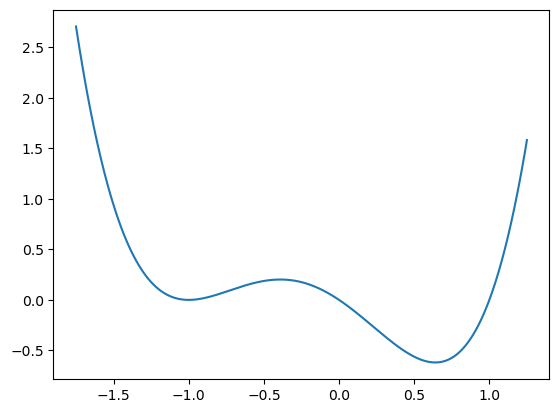

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb1416400>

In [8]:
p = plot(x,f(x))

In [9]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

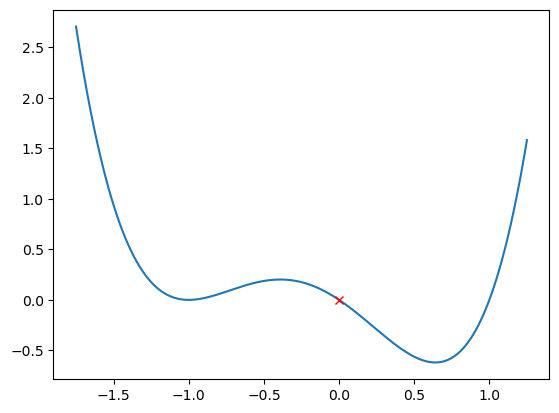

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb13a2040>

In [10]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

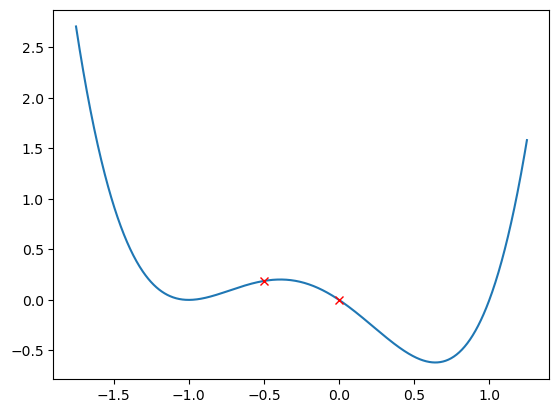

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb13a20a0>
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb13a2460>

In [11]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [12]:
∇2f(0.0)

-2.0

In [13]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

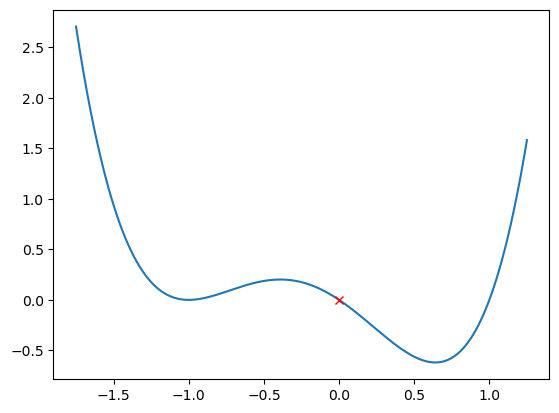

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb12d7e80>

In [14]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

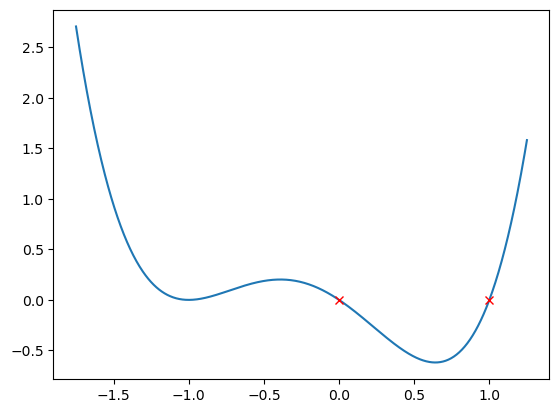

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb12c33d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb12c34c0>

In [15]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [17]:
function backtracking_regularized_newton_step(x0)
    b = 0.1
    c = 0.5
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    Δx = -H\∇f(x0)
    
    α = 1.0
    y_actstep=f(x0 + α*Δx)
    y_overstep=(x0) + b*α*∇f(x0)*Δx
    while f(x0 + α*Δx) > f(x0) + b*α*∇f(x0)*Δx
        α = c*α
    end
    
    xn = x0 + α*Δx
    
    return xn,y_actstep,y_overstep
end

backtracking_regularized_newton_step (generic function with 1 method)

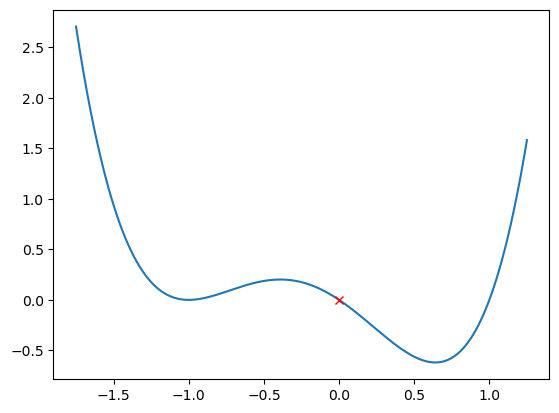

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb12143d0>

In [18]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

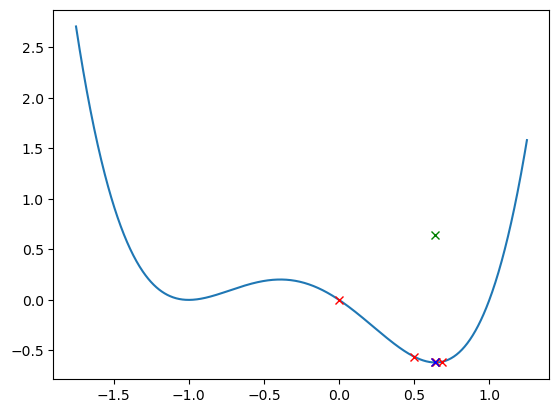

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cb10b6d90>

In [22]:
xnew,y_a,y_o = backtracking_regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")
plot(xnew,y_a,"bx")
plot(xnew,y_o,"gx")